In [1]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

from pandas.tools.plotting import scatter_matrix
import nltk
from ast import literal_eval
from datetime import timedelta
import string

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
# create loader object
L = instaloader.Instaloader()

#Set PANDAS to show all columns in DataFrame
# pd.set_option('display.max_columns', None)
# plt.rcParams['figure.figsize'] = (15, 5)

UTC_FILE_NAME = "_UTC"
COMMENTS_FILE_NAME = "_comments"
FILE_ADDRESS_NAME = "InstagramLog/"


DONALD_TRUMP = 'realdonaldtrump'
DONALD_TRUMP_NAME = 'President Donald J. Trump'
DONALD_TRUMP_BIO = '45th President of the United States'
DONALD_TRUMP_COLOR = '#446fc4'
DONALD_TRUMP_TRAIN_SET = DONALD_TRUMP_NAME + DONALD_TRUMP + DONALD_TRUMP_BIO + 'president of the united state of america.'

BARACK_OBAMA = 'barackobama'
BARACK_OBAMA_NAME = 'Barack Obama'
BARACK_OBAMA_BIO = 'Dad, husband, President, citizen.'
BARACK_OBAMA_COLOR = '#7f2d9b'
BARACK_OBAMA_TRAIN_SET = BARACK_OBAMA + BARACK_OBAMA_NAME + BARACK_OBAMA_BIO + '44th President of the United States.'

EMMANUEL_MACRON = 'emmanuelmacron'
EMMANUEL_MACRON_NAME = 'Emmanuel Macron'
EMMANUEL_MACRON_BIO = 'Président de la République française.'
EMMANUEL_MACRON_COLOR = '#369b4f'
EMMANUEL_MACRON_TRAIN_SET = EMMANUEL_MACRON + EMMANUEL_MACRON_NAME + EMMANUEL_MACRON_BIO

#politicians
DONALD_TRUMP = 'realdonaldtrump'
BARACK_OBAMA = 'barackobama'
EMMANUEL_MACRON = 'emmanuelmacron'
THERESA_MAY = 'theresamay'
THERESA_MAY_COLOR = '#b7c631'
FLOTUS = 'flotus'

#news agencies
CNN = 'cnn'
FOXNEWS = 'foxnews'
BBC = 'bbcnews'
GOAL_COM = 'goalglobal' #sport

# sport stars
LEOMESSI = 'leomessi'
LEOMESSI_COLOR = '#e8d2d0'

CRISTIANO_RONALDO = 'cristiano'
CRISTIANO_RONALDO_COLOR = '#bec6c0'

RAFAEL_NADAL = 'rafaelnadal'
ROGER_FEDERER = 'rogerfederer'
NOVAK_DJOKOVIC = 'djokernole'

# sport clubs
REAL_MADRID = 'realmadrid'
FC_BARCELONA = 'fcbarcelona'


LIST_ALL_USERS = [DONALD_TRUMP , BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY, FLOTUS, CNN, FOXNEWS, BBC, LEOMESSI, CRISTIANO_RONALDO,RAFAEL_NADAL ]

# MongoDB Database
instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
instagram_db = instagramClient["Instagram"]
instagram_col_post = instagram_db["Post"]
instagram_col_comment = instagram_db["Comment"]
instagram_col_like = instagram_db["Like"]
instagram_col_analyse = instagram_db["Analyse"]
instagram_col_mentioned_in_comment = instagram_db["MentionedInComment"]

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/koosha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/koosha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df_clustered = pd.read_csv('clustered_data_new.csv')
print(df_clustered.shape[0])

3832


In [4]:
df_clustered.head()

Unnamed: 0  username  name       bio  photo  nfollower  nfollowee  \
0           0  0.303216   0.0  0.000000      0   0.000022   0.052744   
1           1  0.000000   0.0  0.379978      0   0.002047   0.181007   
2           2  0.000000   0.0  0.407353      0   0.000332   0.131993   
3           3  0.000000   0.0  0.482680      0   0.000162   0.079382   
4           4  0.000000   0.0  0.303216      0   0.000061   0.055940   

   nmediacount  follower  followee  \
0     0.006037       170       396   
1     0.013694     15659      1359   
2     0.015847      2539       991   
3     0.011386      1240       596   
4     0.003862       468       420   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                                  comment_created_at  \
0                                                 --   
1                                                 --   
2                                                 --   
3  2018-11-29 19:31:24,,,2018-11-29 19:32:55,,,20...   
4                                                 --   

                                          comment_id  \
0                                                 --   
1                                                 --   
2                                                 --   
3  17931832384236216,,,17996948788073749,,,179064...   
4                                                 --   

                    comment_post_shortcode  \
0                                       --   
1                                       --   
2                                       --   
3  BqxGs_YF-Ph,,,BqxGs_YF-Ph,,,BqxGs_YF-Ph   
4                                       --   

                          comment_shortcode_username  \
0                                                 --   
1                                                 --   
2                                                 --   
3  realdonaldtrump,,,realdonaldtrump,,,realdonald...   
4                                                 --   

                                        comment_text  comment_total  \
0                                                 --              0   
1                                                 --              0   
2                                                 --              0   
3  ❤️,,,@ajmal_hakkim_ if you had proper grammar ...              3   
4                                                 --              0   

  like_total                            like_shortcode_username  \
0          0                                            foxnews   
1          0                                            reuters   
2          0  emmanuelmacron,,,emmanuelmacron,,,emmanuelmacr...   
3          1                                    realdonaldtrump   
4          0                                            reuters   

                                 like_post_shortcode  \
0                                        Bqx7XNahvfY   
1                                        Br8XsKaFUIc   
2  BqUv1eonVJQ,,,BqUrbhqHY9X,,,BqNGePuFrq0,,,BqDc...   
3                                        Bpe4fLZApVQ   
4                                        Br-5eUAlbwA   

                                             like_id  
0                           5c45d2950c2acb018cef1933  
1                           5cb4d9b4b5d85c11bf444a63  
2  5c13dbc30c2acb135537daec,,,5c13e8eb0c2acb13553...  
3                           5be46d700c2acb7ef4464bb7  
4                           5cb4d8b9b5d85c11bf44353a  

[5 rows x 40 columns]

In [5]:
class_method = 'class GM 3'
df_grouped = df_clustered.groupby(class_method)
groups = df_grouped.groups
groups.keys()

dict_keys([0, 1, 2])

In [6]:
grouped_0 = df_grouped.get_group(0)
grouped_1 = df_grouped.get_group(1)
grouped_2 = df_grouped.get_group(2)
# grouped_3 = df_grouped.get_group(3)

In [7]:
grouped_0.head()

Unnamed: 0  username      name       bio  photo  nfollower  nfollowee  \
0           0  0.303216  0.000000  0.000000      0   0.000022   0.052744   
3           3  0.000000  0.000000  0.482680      0   0.000162   0.079382   
4           4  0.000000  0.000000  0.303216      0   0.000061   0.055940   
5           5  0.449436  0.260556  0.000000      0   0.000008   0.016516   
7           7  0.000000  0.000000  0.318784      0   0.000023   0.141050   

   nmediacount  follower  followee            ...             \
0     0.006037       170       396            ...              
3     0.011386      1240       596            ...              
4     0.003862       468       420            ...              
5     0.001465        58       124            ...              
7     0.000866       178      1059            ...              

                                  comment_created_at  \
0                                                 --   
3  2018-11-29 19:31:24,,,2018-11-29 19:32:55,,,20...   
4                                                 --   
5                                                 --   
7                                                 --   

                                          comment_id  \
0                                                 --   
3  17931832384236216,,,17996948788073749,,,179064...   
4                                                 --   
5                                                 --   
7                                                 --   

                    comment_post_shortcode  \
0                                       --   
3  BqxGs_YF-Ph,,,BqxGs_YF-Ph,,,BqxGs_YF-Ph   
4                                       --   
5                                       --   
7                                       --   

                          comment_shortcode_username  \
0                                                 --   
3  realdonaldtrump,,,realdonaldtrump,,,realdonald...   
4                                                 --   
5                                                 --   
7                                                 --   

                                        comment_text  comment_total  \
0                                                 --              0   
3  ❤️,,,@ajmal_hakkim_ if you had proper grammar ...              3   
4                                                 --              0   
5                                                 --              0   
7                                                 --              0   

  like_total  like_shortcode_username  like_post_shortcode  \
0          0                  foxnews          Bqx7XNahvfY   
3          1          realdonaldtrump          Bpe4fLZApVQ   
4          0                  reuters          Br-5eUAlbwA   
5          0              rafaelnadal          BqmqbmCAn_q   
7          0              rafaelnadal          BqpsJ_zgPMY   

                    like_id  
0  5c45d2950c2acb018cef1933  
3  5be46d700c2acb7ef4464bb7  
4  5cb4d8b9b5d85c11bf44353a  
5  5c672f57b5d85c3e0ad9e6e6  
7  5c66ef14b5d85c3ba634a7dc  

[5 rows x 40 columns]

In [8]:
df_grouped_described = df_clustered.groupby(class_method).describe()
df_grouped_described

Unnamed: 0                                                  \
                count         mean          std   min     25%     50%   
class GM 3                                                              
0              1324.0  1696.033233  1113.922749   0.0   664.0  1600.5   
1              1349.0  2085.713121  1048.486204  14.0  1314.0  2011.0   
2              1159.0  1968.094047  1122.698312   1.0   950.5  2019.0   

                                bio           ...   username            \
                75%     max   count      mean ...        75%       max   
class GM 3                                    ...                        
0           2678.25  3826.0  1324.0  0.289955 ...   0.121603  1.000000   
1           3054.00  3828.0  1349.0  0.117105 ...   0.336097  1.000000   
2           2944.00  3831.0  1159.0  0.366125 ...   0.000000  0.709297   

           verified                                               
              count      mean       std  min  25%  50%  75%  max  
class GM 3                                                        
0            1324.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
1            1349.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
2            1159.0  0.003451  0.058671  0.0  0.0  0.0  0.0  1.0  

[3 rows x 184 columns]

In [9]:
df_grouped_described[['follower', 'nfollower']]

follower                                                           \
              count          mean            std  min     25%    50%     75%   
class GM 3                                                                     
0            1324.0    551.946375    1430.682907  0.0  108.75  262.0   558.0   
1            1349.0   7935.690141   40215.834063  0.0   52.00  194.0  1072.0   
2            1159.0  16968.532355  312706.762531  1.0  123.50  379.0  1110.5   

                      nfollower                                              \
                  max     count      mean       std           min       25%   
class GM 3                                                                    
0             30620.0    1324.0  0.000072  0.000187  0.000000e+00  0.000014   
1            585465.0    1349.0  0.001037  0.005257  0.000000e+00  0.000007   
2           7650215.0    1159.0  0.002218  0.040876  1.307153e-07  0.000016   

                                          
                 50%       75%       max  
class GM 3                                
0           0.000034  0.000073  0.004003  
1           0.000025  0.000140  0.076529  
2           0.000050  0.000145  1.000000

In [10]:
df_grouped_described[['followee', 'nfollowee']]

followee                                                     \
              count        mean          std  min    25%    50%    75%   
class GM 3                                                               
0            1324.0  608.721299   967.392439  0.0  126.0  335.0  650.0   
1            1349.0  610.123054  1284.328732  0.0   41.0  142.0  468.0   
2            1159.0  754.255393  1356.311851  0.0  105.0  284.0  706.5   

                   nfollowee                                               \
               max     count      mean       std  min       25%       50%   
class GM 3                                                                  
0           7501.0    1324.0  0.081076  0.128848  0.0  0.016782  0.044619   
1           7508.0    1349.0  0.081263  0.171061  0.0  0.005461  0.018913   
2           7507.0    1159.0  0.100460  0.180649  0.0  0.013985  0.037826   

                                
                 75%       max  
class GM 3                      
0           0.086574  0.999068  
1           0.062334  1.000000  
2           0.094100  0.999867

In [11]:
df_grouped_described[['mediacount', 'nmediacount']]

mediacount                                                   \
                count        mean          std  min  25%   50%     75%   
class GM 3                                                               
0              1324.0   88.141994   326.202420  0.0  5.0  16.0   58.25   
1              1349.0  179.042254   504.192874  0.0  6.0  24.0  113.00   
2              1159.0  170.574633  1416.062570  0.0  6.0  22.0   79.00   

                    nmediacount                                               \
                max       count      mean       std  min       25%       50%   
class GM 3                                                                     
0            8901.0      1324.0  0.001956  0.007240  0.0  0.000111  0.000355   
1            6199.0      1349.0  0.003974  0.011190  0.0  0.000133  0.000533   
2           45057.0      1159.0  0.003786  0.031428  0.0  0.000133  0.000488   

                                
                 75%       max  
class GM 3                      
0           0.001293  0.197550  
1           0.002508  0.137581  
2           0.001753  1.000000

In [12]:
df_grouped_described['username']

count      mean       std  min  25%       50%       75%       max
class GM 3                                                                    
0           1324.0  0.095032  0.178262  0.0  0.0  0.000000  0.121603  1.000000
1           1349.0  0.236320  0.242152  0.0  0.0  0.260556  0.336097  1.000000
2           1159.0  0.075571  0.157661  0.0  0.0  0.000000  0.000000  0.709297

In [13]:
df_grouped_described['name']

count      mean       std  min       25%       50%       75%  \
class GM 3                                                                  
0           1324.0  0.137070  0.250545  0.0  0.000000  0.000000  0.303216   
1           1349.0  0.512738  0.300282  0.0  0.335176  0.449436  0.709297   
2           1159.0  0.000828  0.020353  0.0  0.000000  0.000000  0.000000   

                 max  
class GM 3            
0           1.000000  
1           1.000000  
2           0.579739

In [14]:
df_grouped_described['photo']

count      mean       std  min  25%  50%  75%  max
class GM 3                                                     
0           1324.0  0.044562  0.206418  0.0  0.0  0.0  0.0  1.0
1           1349.0  0.247591  0.431773  0.0  0.0  0.0  0.0  1.0
2           1159.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0

In [15]:
df_grouped_described['bio']

count      mean       std  min       25%       50%       75%  max
class GM 3                                                                    
0           1324.0  0.289955  0.234051  0.0  0.000000  0.335176  0.410363  1.0
1           1349.0  0.117105  0.188265  0.0  0.000000  0.000000  0.175786  1.0
2           1159.0  0.366125  0.207367  0.0  0.303216  0.355477  0.502329  1.0

In [16]:
df_grouped_described['private']

count  mean  std  min  25%  50%  75%  max
class GM 3                                            
0           1324.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
1           1349.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2           1159.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [17]:
df_grouped_described['verified']

count      mean       std  min  25%  50%  75%  max
class GM 3                                                     
0           1324.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
1           1349.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2           1159.0  0.003451  0.058671  0.0  0.0  0.0  0.0  1.0

In [18]:
df_grouped_described['mcm']

count      mean       std  min  25%  50%  75%  max
class GM 3                                                     
0           1324.0  1.280211  0.558749  1.0  1.0  1.0  1.0  4.0
1           1349.0  2.171238  0.839247  1.0  2.0  2.0  3.0  4.0
2           1159.0  1.067299  0.257446  1.0  1.0  1.0  1.0  3.0

In [19]:
df_grouped_described['lcm']

count  mean  std  min  25%  50%  75%  max
class GM 3                                            
0           1324.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
1           1349.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
2           1159.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [20]:
grouped_1['combined_username']

14                   rafaelnadalfc
15                       rafasaiya
23                     tolonadal13
25                         cry_yyy
34                         rafaja9
38                        cweissss
40                 moji_madridista
60                       rafa.veco
64                 cornellwilson12
72                      rafasoto46
78                          rvfaa_
85                       rafinhanz
86                         rafaft9
87                      cm.fonseca
94             pepitodelasgalletas
98                    sajjadhidary
106                        fubia78
111                shounak_deodhar
112                rafanadal.fan86
118                roger__official
119                       rg1_rafa
124           cristianoronaldo_nr1
127                cristiano_andre
129                      ramulecor
144                    c.rona777do
145                    rafaromeroc
148               cristianosouza10
152                        ratsiir
158                 

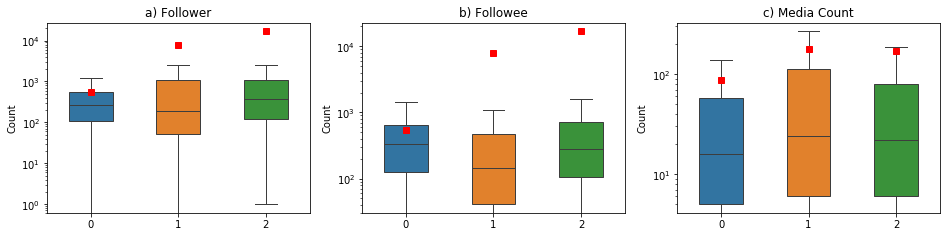

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,3.5))

s1 = grouped_0['follower']
s1.name = '0'
s2 = grouped_1['follower']
s2.name = '1'
s3 = grouped_2['follower']
s3.name = '2'
data3 = pd.concat([s1, s2, s3], axis=1)
boxplot7 = sns.boxplot( data=data3, showfliers=False, width=0.5,  linewidth=1, ax=ax1)#, showmeans=True)
boxplot7.plot(data3.mean(), 'rs')
boxplot7.set_yscale('log')
boxplot7.set_ylabel("Count")
boxplot7.set_title("a) Follower")

s1 = grouped_0['followee']
s1.name = '0'
s2 = grouped_1['followee']
s2.name = '1'
s3 = grouped_2['followee']
s3.name = '2'
data2 = pd.concat([s1, s2, s3], axis=1)
boxplot2 = sns.boxplot( data=data2, showfliers=False, width=0.5,  linewidth=1, ax=ax2)#, showmeans=True)
boxplot2.plot(data3.mean(), 'rs')
boxplot2.set_yscale('log')
boxplot2.set_ylabel("Count")
boxplot2.set_title("b) Followee")


s1 = grouped_0['mediacount']
s1.name = '0'
s2 = grouped_1['mediacount']
s2.name = '1'
s3 = grouped_2['mediacount']
s3.name = '2'
data3 = pd.concat([s1, s2, s3], axis=1)
boxplot3 = sns.boxplot( data=data3, showfliers=False, width=0.5,  linewidth=1, ax=ax3)#, showmeans=True)
boxplot3.plot(data3.mean(), 'rs')
boxplot3.set_yscale('log')
boxplot3.set_ylabel("Count")
boxplot3.set_title("c) Media Count")

plt.show()




Text(0.5,0,'Follower')

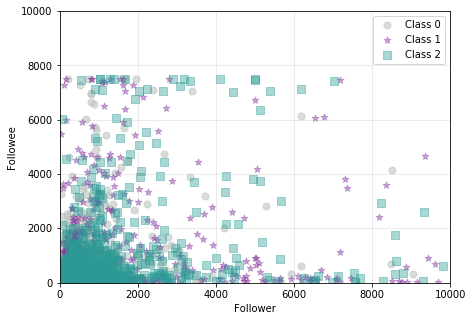

In [22]:

fig, (ax1) = plt.subplots(1,1, figsize=(7,5))

ax = grouped_0.plot.scatter(x='follower', y='followee', ax=ax1, c='#bec6c0', alpha=0.6, logy=False, logx=False, grid=True, s=50,  marker="o", legend=True, label='Class 0')

ax = grouped_1.plot.scatter(x='follower', y='followee', ax=ax1, c='#7f2d9b', alpha=0.4, logy=False, logx=False, grid=True, s=50,  marker='*', legend=True, label='Class 1')

ax = grouped_2.plot.scatter(x='follower', y='followee', ax=ax1, c='#2c9b95', alpha=0.4, logy=False, logx=False, grid=True, s=50,  marker='s', legend=True, label='Class 2')

# ax = grouped_3.plot.scatter(x='follower', y='followee', ax=ax1, c='#446fc4', alpha=0.5, logy=True, logx=False, grid=True, s=50,  marker='v', legend=True, label='Class 3')


ax.axes.set_xlim([-10,10000])
ax.axes.set_ylim([-10,10000])

ax.grid(True, which='both', linestyle='-', alpha=0.3)

ax.set_ylabel("Followee")
ax.set_xlabel("Follower")

